In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
# reading training and test data
train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")
train.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
# happy customer have target = 0 and unhappy customer have target = 1
# only 4% of customer is unhappy and rest are happy customer
# unbalanced data set
df = pd.DataFrame(train.TARGET.value_counts())
df['percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,percentage
0,73012,96.043147
1,3008,3.956853


In [3]:
### Var3 : Nationality of Customer ###

In [4]:
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [5]:
# 116 valued column is -999999 it is kind of missing value
train.loc[train.var3 == -999999].shape

(116, 371)

In [6]:
# replacing var3 = -999999 with most common value i.e. 2
train = train.replace(-999999, 2)


In [7]:
### Add feature that counts the number of zeros in row ###


In [8]:
X = train.iloc[:,:-1]
y = train.TARGET

X['n0'] = (X==0).sum(axis = 1)
train['n0'] = X['n0']

In [9]:
###num_var4 : Number of bank product###
%matplotlib inline

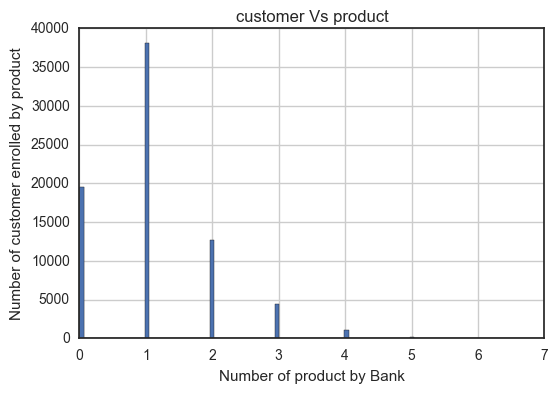

In [10]:
train.num_var4.hist(bins=100)
plt.xlabel("Number of product by Bank")
plt.ylabel("Number of customer enrolled by product")
plt.title("customer Vs product")
plt.show()

In [11]:
# above chart clearly shows that approx. half of customer is enrolled in product 1

In [12]:
# checking density of happy/unhappy customer in meaning of number of bank product

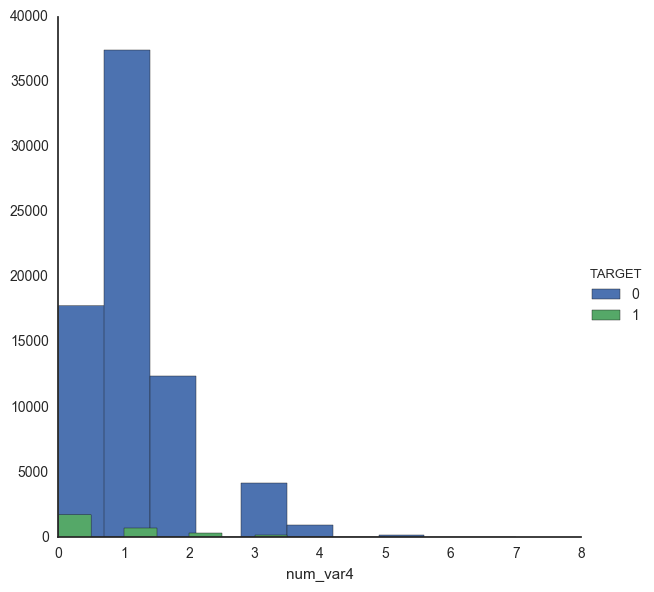

In [13]:
sns.FacetGrid(train, hue = 'TARGET', size = 6) \
    .map(plt.hist, 'num_var4') \
    .add_legend()
plt.show()

In [14]:
# here we can clearlly see that number of unhappy customer is more with product 0 and product 1

In [15]:
# accounting of unhappy customer

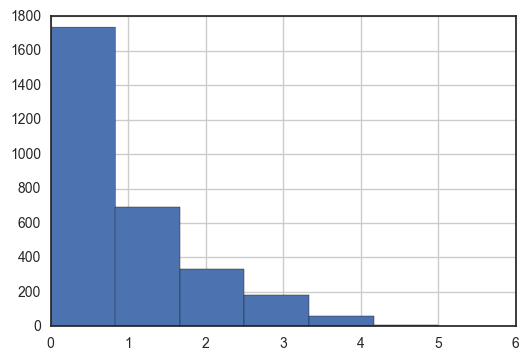

In [16]:
train[train.TARGET == 1].num_var4.hist(bins = 6)
plt.show()

In [17]:
## Exploring var15 ##

In [18]:
train['var15'].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

In [19]:
# plotting histogram

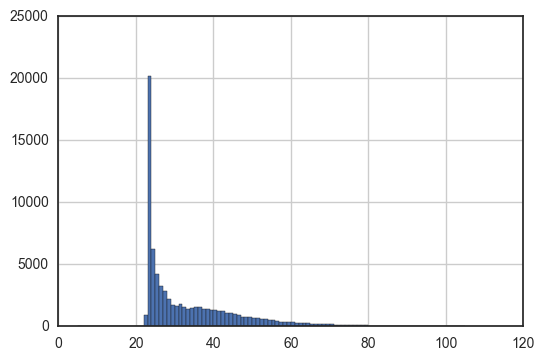

In [20]:
train['var15'].hist(bins = 100)

C:\Users\K$\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


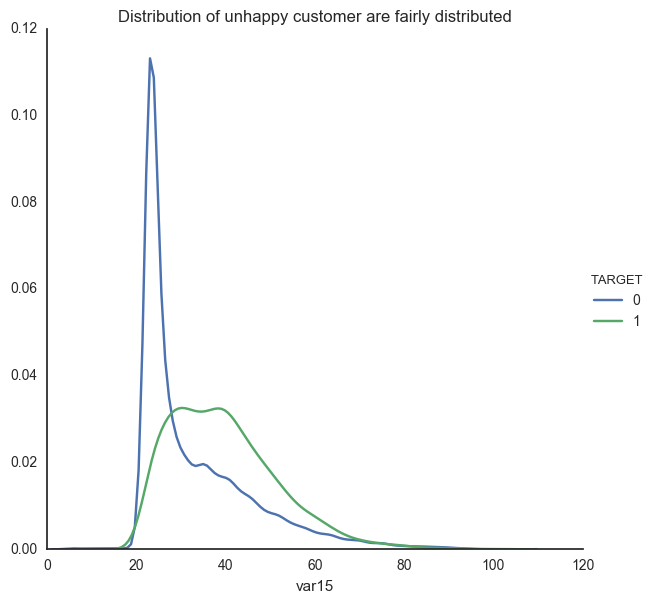

In [21]:
sns.FacetGrid(train, hue = 'TARGET', size = 6) \
   .map(sns.kdeplot, 'var15') \
    .add_legend()
plt.title("Distribution of unhappy customer are fairly distributed")

In [22]:
## saldo_var30 ##

(0, 3458077.3199999998)

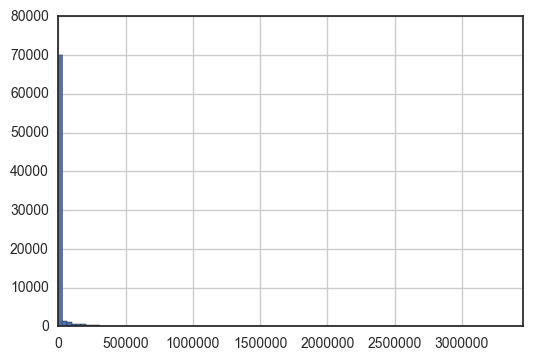

In [23]:
train.saldo_var30.hist(bins = 100)
plt.xlim(0, train.saldo_var30.max())

In [24]:
# improving plot my making X-axis logarithmic

In [25]:
train["log_saldo_var30"] = train.saldo_var30.map(np.log)

C:\Users\K$\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


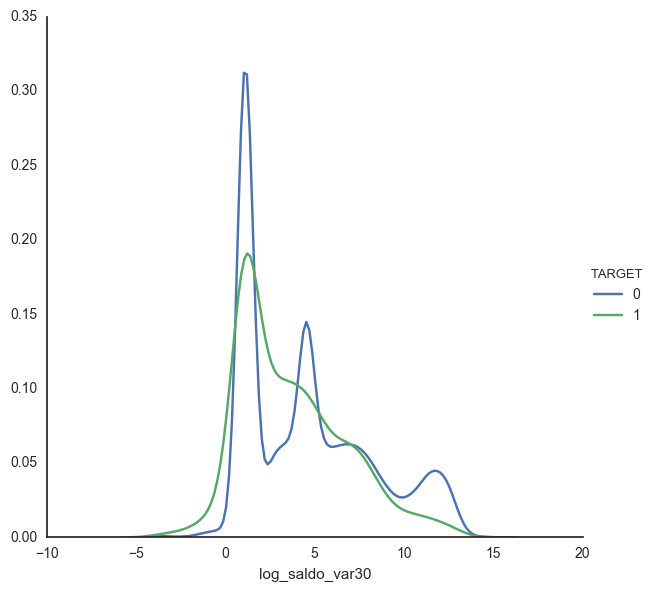

In [26]:
sns.FacetGrid(train, hue = "TARGET", size = 6) \
    .map(sns.kdeplot, 'log_saldo_var30') \
    .add_legend()

In [27]:
# this variable also consist unhappy customer a lot

In [28]:
## Exploring intersection between var15 and var38 ##

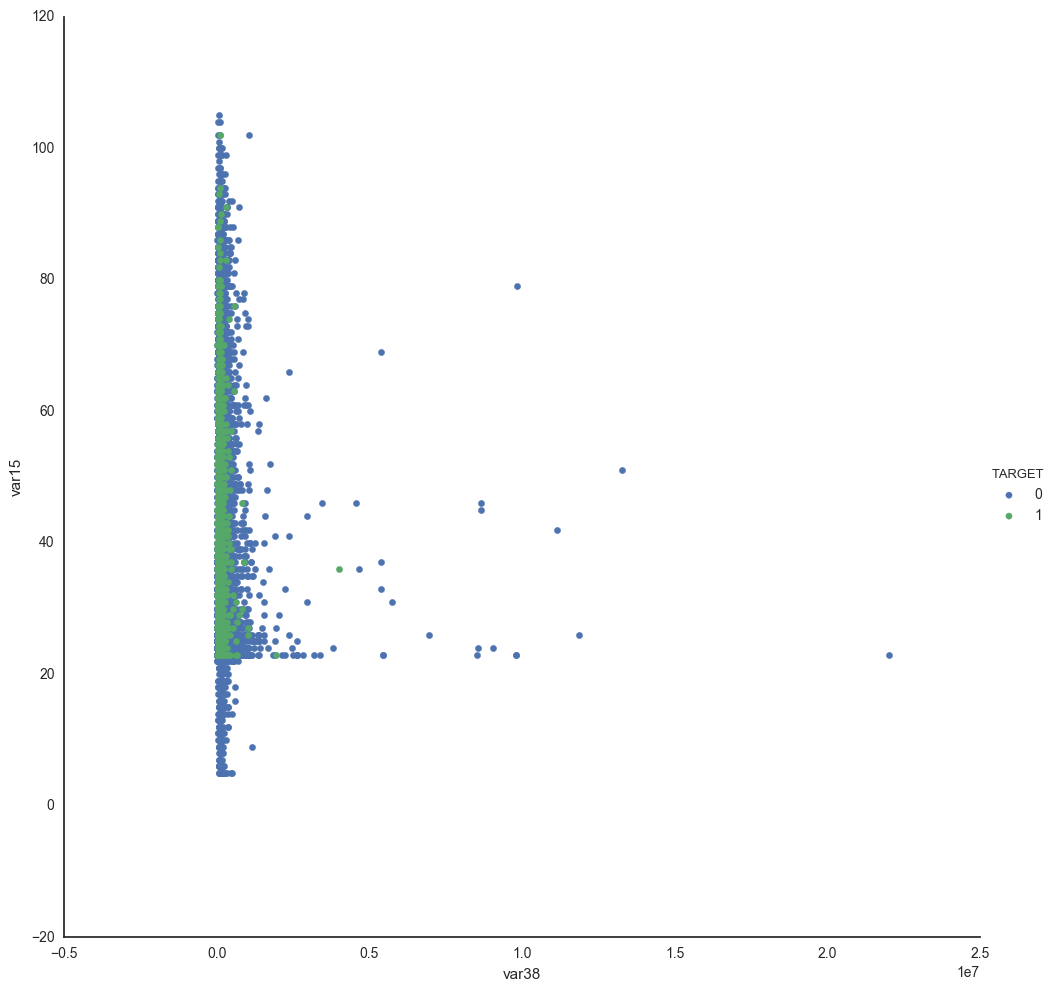

In [29]:
sns.FacetGrid(train, hue = 'TARGET', size = 10) \
   .map(plt.scatter , 'var38', 'var15') \
    .add_legend()

In [30]:
# plotting var38 with log value
train['logvar38'] = train.var38.map(np.log)

(0, 120)

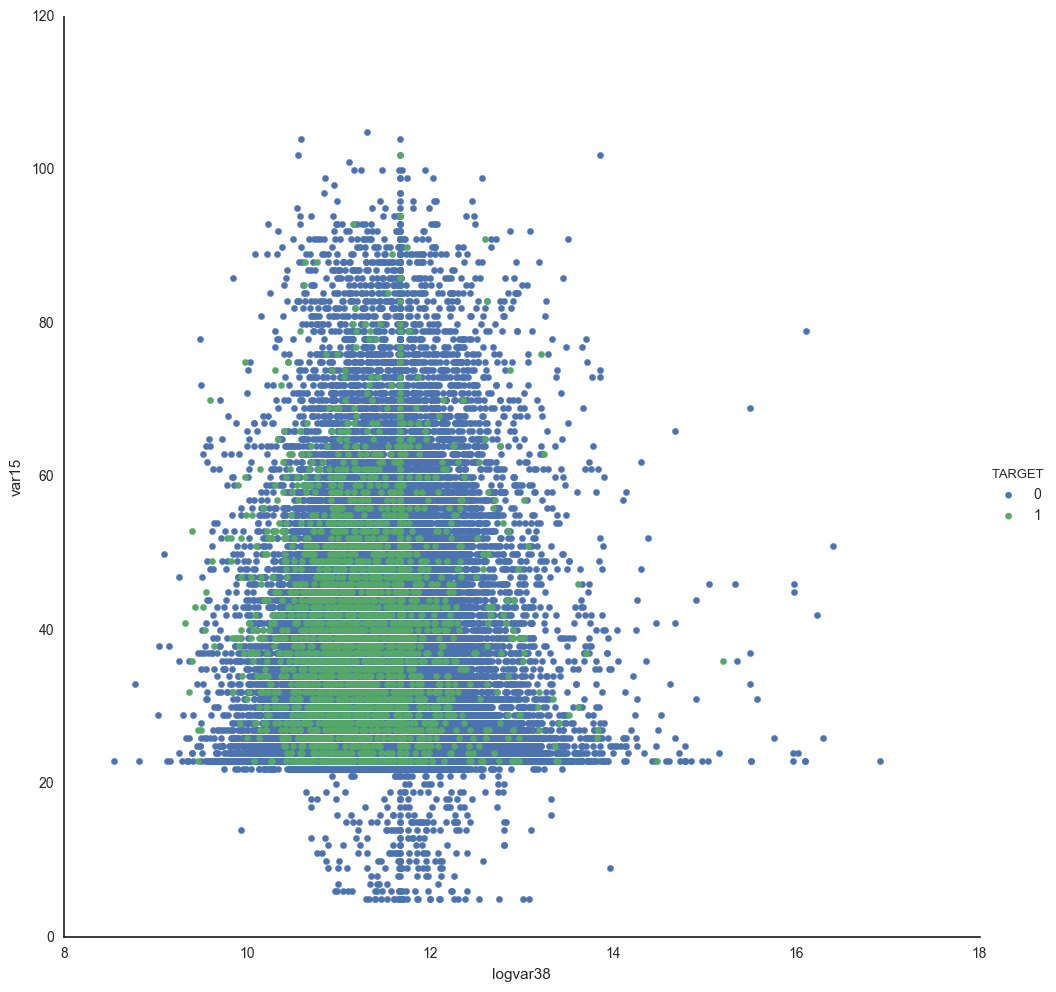

In [31]:
sns.FacetGrid(train, hue = 'TARGET', size = 10) \
   .map(plt.scatter, 'logvar38' , 'var15') \
    .add_legend()
plt.ylim([0, 120])

C:\Users\K$\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


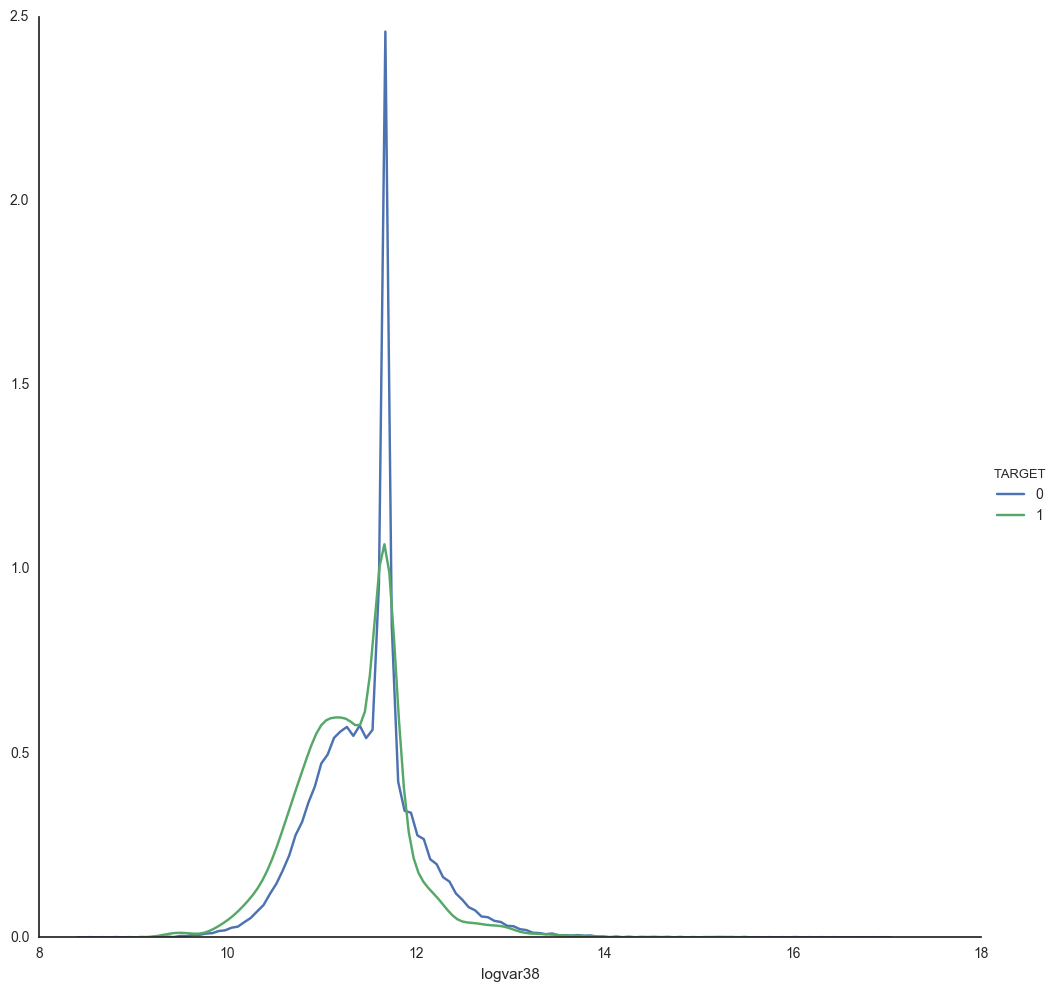

In [32]:
sns.FacetGrid(train, hue = 'TARGET', size = 10) \
    .map(sns.kdeplot, 'logvar38') \
    .add_legend()

In [33]:
## checking density of n0 we had created earlier

C:\Users\K$\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


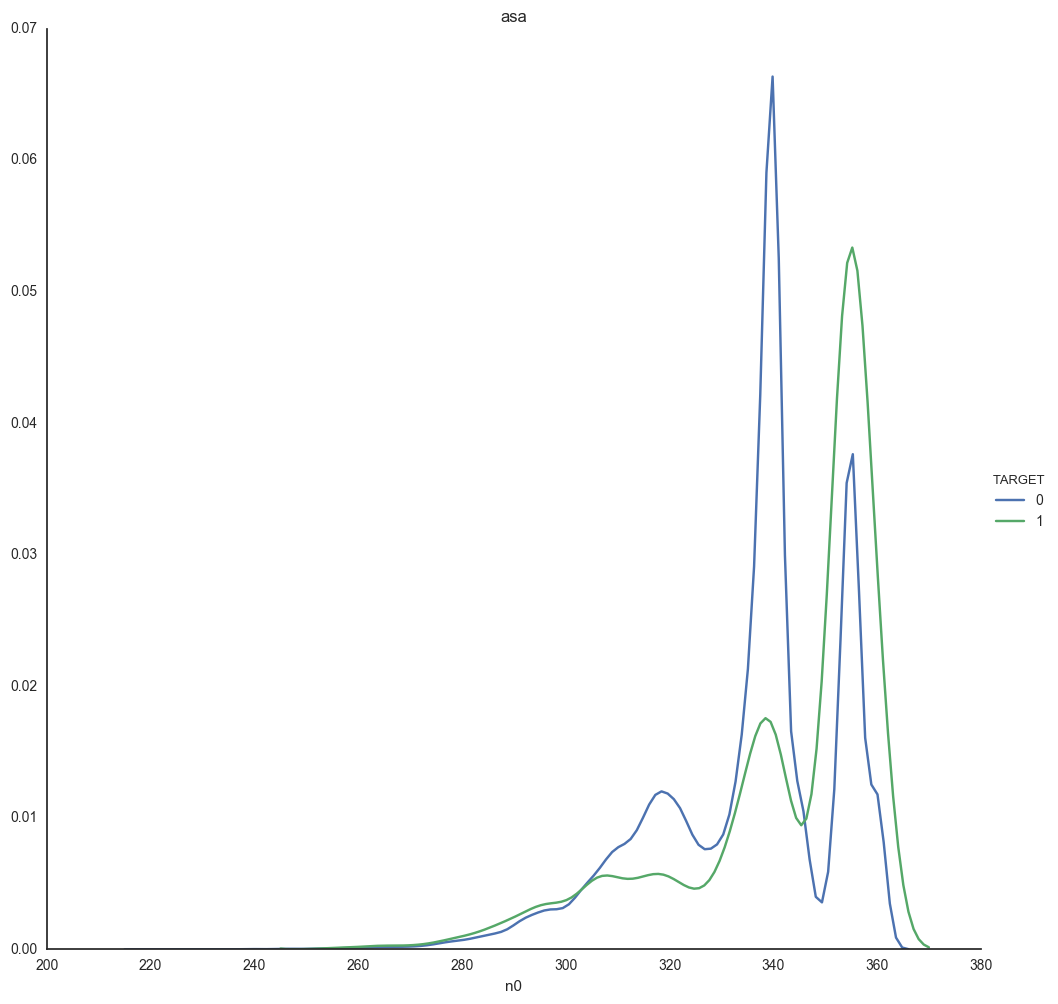

In [34]:
sns.FacetGrid(train, hue = 'TARGET', size = 10) \
   .map(sns.kdeplot, 'n0') \
    .add_legend()
plt.title("asa")